<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/hw1_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1
**Tianbo Qiu (tq2137)**

##Part 1
**Linear Model to classify the Fashion MNIST**

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

# Data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
## prepocessing
train_images = train_images / 255.0
test_images = test_images / 255.0
## validation set for training, size 10000
val_images = train_images[:10000]
val_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

# Model - Linear
def build_model_linear():
  model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


def plot_loss(history):
  history_dict = history.history
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(loss)+1)
  plt.plot(epochs, loss, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_acc(history):
  history_dict = history.history
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  
  epochs = range(1, len(acc)+1)
  
  plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()



4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#model = build_model_1hidden()
model = build_model_linear()
history = model.fit(partial_train_images, partial_train_labels, epochs=10,validation_data=(val_images, val_labels))

Instructions for updating:
Colocations handled automatically by placer.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.6258 - acc: 0.7873 - val_loss: 0.4938 - val_acc: 0.8365
Epoch 2/10
50000/50000 [==============================] - 5s 110us/sample - loss: 0.4728 - acc: 0.8396 - val_loss: 0.4611 - val_acc: 0.8440
Epoch 3/10
50000/50000 [==============================] - 6s 112us/sample - loss: 0.4424 - acc: 0.8478 - val_loss: 0.4439 - val_acc: 0.8485
Epoch 4/10
50000/50000 [==============================] - 6s 115us/sample - loss: 0.4273 - acc: 0.8533 - val_loss: 0.4461 - val_acc: 0.8404
Epoch 5/10
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4169 - acc: 0.8563 - val_loss: 0.4395 - val_acc: 0.8456
Epoch 6/10
50000/50000 [==============================] - 5s 108us/sample - loss: 0.4098 - acc: 0.8583 - val_loss: 0.4322 - val_acc: 0.8528
Epoch 7/10
50000/50000 [==============

**Training accuracy vs. Validation accuracy**

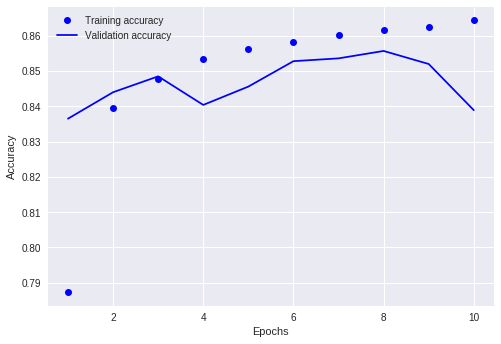

In [0]:
# Part 1.1
plot_acc(history)

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.4961 - acc: 0.8320
Test accuracy: 0.832


**1.2 Deep neural network**

In [0]:
# Part1.2
def build_model():
  model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation=tf.nn.relu),
      layers.Dropout(0.2),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

model2 = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 5 == 0: print("")
    print('*',end='')
history2 = model2.fit(partial_train_images, partial_train_labels, batch_size = 512, epochs=50,validation_data=(val_images, val_labels))
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 17us/sample - loss: 0.8393 - acc: 0.7115 - val_loss: 0.4947 - val_acc: 0.8288
Epoch 2/50
50000/50000 [==============================] - 1s 13us/sample - loss: 0.4952 - acc: 0.8278 - val_loss: 0.4217 - val_acc: 0.8515
Epoch 3/50
50000/50000 [==============================] - 1s 13us/sample - loss: 0.4361 - acc: 0.8460 - val_loss: 0.3895 - val_acc: 0.8633
Epoch 4/50
50000/50000 [==============================] - 1s 13us/sample - loss: 0.4026 - acc: 0.8565 - val_loss: 0.3645 - val_acc: 0.8708
Epoch 5/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.3795 - acc: 0.8642 - val_loss: 0.3627 - val_acc: 0.8705
Epoch 6/50
50000/50000 [==============================] - 1s 14us/sample - loss: 0.3604 - acc: 0.8699 - val_loss: 0.3455 - val_acc: 0.8761
E

**1.3 Model Visualization**

**The linear model:**

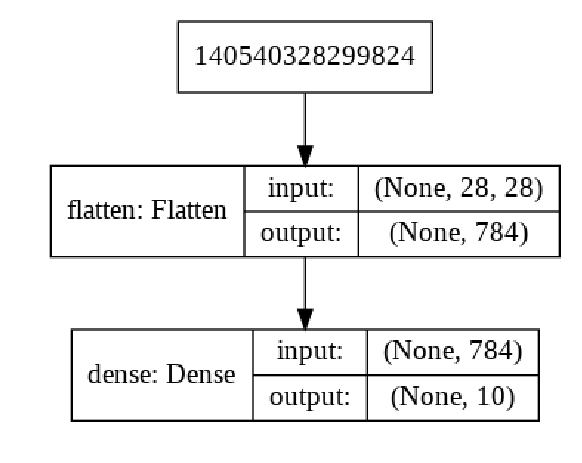

In [0]:
# Part 1.3
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model
# linear model
image_path = 'model.png'
plot_model(model, show_shapes=True, to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()


**The Deep model:**

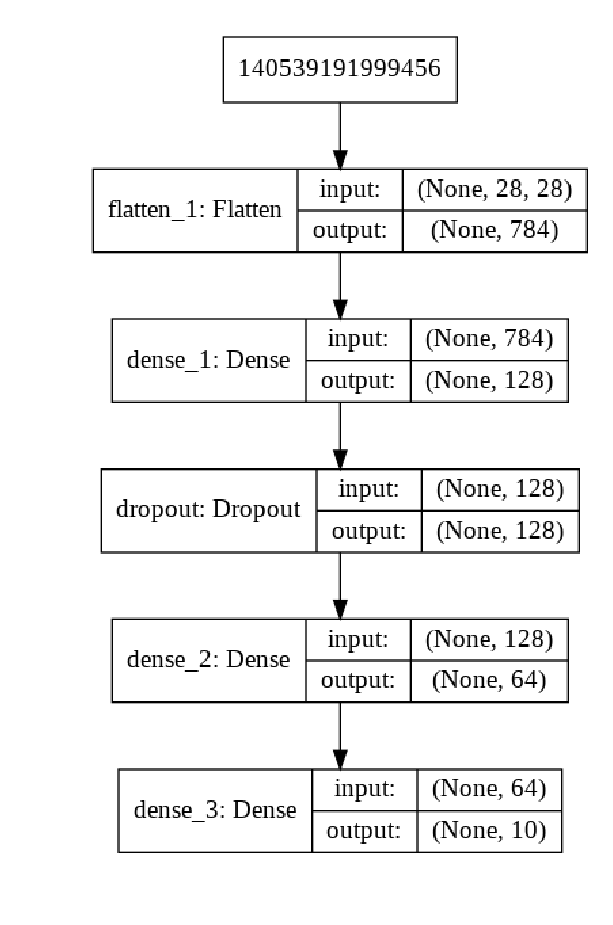

In [0]:
# deep model
image_path2 = 'model_deep.png'
plot_model(model2, show_shapes=True, to_file = image_path2)
plt.figure(dpi=200)
implot = plt.imshow(mpimg.imread(image_path2))
plt.axis('off')
plt.show()

**1.4 Produce the confusion matrix**

In [0]:
# Part 1.4 Confusion Matrix
from sklearn.metrics import confusion_matrix
## for the deep model
predictions = model2.predict(test_images)

In [0]:
import itertools

In [0]:
pred = [np.argmax(i) for i in predictions]

In [0]:
cnf_matrix = confusion_matrix(test_labels, pred)

Confusion matrix, without normalization
[[846   1  11  24   3   0 108   0   7   0]
 [  1 973   0  17   3   0   5   0   1   0]
 [ 21   1 806  14  59   2  97   0   0   0]
 [ 14   4   7 925  22   1  23   0   4   0]
 [  1   0 127  38 756   0  77   0   1   0]
 [  0   0   0   1   0 968   0  18   1  12]
 [126   2  61  30  45   1 725   0  10   0]
 [  0   0   0   0   0  18   0 961   0  21]
 [  4   1   2   6   1   3   7   3 972   1]
 [  0   0   0   0   0   8   1  30   0 961]]


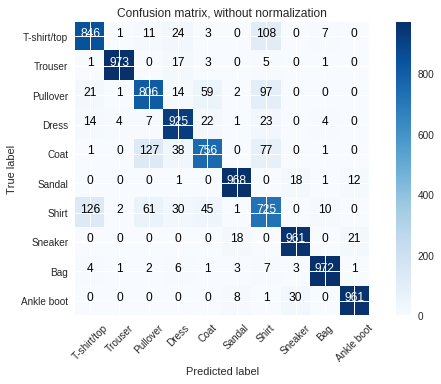

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
